In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from scipy.signal import find_peaks

In [3]:
def generate_ecg_data(duration, sampling_rate=250):
    def generate_ecg_pulse(duration, sampling_rate):
        t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
        # P wave
        p_wave = 0.15 * np.sin(2 * np.pi * 1.5 * t) * np.exp(-((t - 0.1) ** 2) / 0.005)
        # QRS complex
        qrs_complex = np.zeros_like(t)
        qrs_complex[(t > 0.2) & (t < 0.25)] = -0.3
        qrs_complex[(t > 0.25) & (t < 0.3)] = 1.0
        qrs_complex[(t > 0.3) & (t < 0.35)] = -0.2
        # T wave
        t_wave = 0.3 * np.sin(2 * np.pi * 0.75 * (t - 0.45)) * np.exp(-((t - 0.45) ** 2) / 0.015)
        # Combine all components
        pulse = p_wave + qrs_complex + t_wave
        # Add high-frequency noise to the pulse
        high_freq_noise = 0.05 * np.sin(2 * np.pi * 50 * t)
        pulse += high_freq_noise
        return pulse
 

    # Generate a single ECG pulse
    single_pulse = generate_ecg_pulse(0.8, sampling_rate)
 

    # Repeat the pulse to create a longer ECG signal
    num_pulses = int(duration / 0.8)
    ecg_data = np.tile(single_pulse, num_pulses)
 

    # Add more noise to make it more realistic
    noise = np.random.normal(0, 0.05, len(ecg_data))  # Increased noise amplitude
    ecg_data += noise
 

    # Add baseline wander
    t = np.linspace(0, duration, len(ecg_data), endpoint=False)
    baseline_wander = 0.1 * np.sin(2 * np.pi * 0.1 * t)
    ecg_data += baseline_wander
 

    # Add power line interference
    power_line_interference = 0.05 * np.sin(2 * np.pi * 60 * t)  # 60 Hz interference
    ecg_data += power_line_interference
 

    # Ensure the length of ecg_data matches the desired duration
    ecg_data = ecg_data[:int(duration * sampling_rate)]
 

    return ecg_data
 

ecg_data = generate_ecg_data(10, 250)
def generate_ecg_data(duration, sampling_rate=250):
    def generate_ecg_pulse(duration, sampling_rate):
        t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
        # P wave
        p_wave = 0.15 * np.sin(2 * np.pi * 1.5 * t) * np.exp(-((t - 0.1) ** 2) / 0.005)
        # QRS complex
        qrs_complex = np.zeros_like(t)
        qrs_complex[(t > 0.2) & (t < 0.25)] = -0.3
        qrs_complex[(t > 0.25) & (t < 0.3)] = 1.0
        qrs_complex[(t > 0.3) & (t < 0.35)] = -0.2
        # T wave
        t_wave = 0.3 * np.sin(2 * np.pi * 0.75 * (t - 0.45)) * np.exp(-((t - 0.45) ** 2) / 0.015)
        # Combine all components
        pulse = p_wave + qrs_complex + t_wave
        # Add high-frequency noise to the pulse
        high_freq_noise = 0.05 * np.sin(2 * np.pi * 50 * t)
        pulse += high_freq_noise
        return pulse

    # Generate a single ECG pulse
    single_pulse = generate_ecg_pulse(0.8, sampling_rate)

    # Repeat the pulse to create a longer ECG signal
    num_pulses = int(duration / 0.8)
    ecg_data = np.tile(single_pulse, num_pulses)

    # Add more noise to make it more realistic
    noise = np.random.normal(0, 0.05, len(ecg_data))  # Increased noise amplitude
    ecg_data += noise

    # Add baseline wander
    t = np.linspace(0, duration, len(ecg_data), endpoint=False)
    baseline_wander = 0.1 * np.sin(2 * np.pi * 0.1 * t)
    ecg_data += baseline_wander

    # Add power line interference
    power_line_interference = 0.05 * np.sin(2 * np.pi * 60 * t)  # 60 Hz interference
    ecg_data += power_line_interference

    # Ensure the length of ecg_data matches the desired duration
    ecg_data = ecg_data[:int(duration * sampling_rate)]

    return ecg_data

ecg_data = generate_ecg_data(10, 250)

PART 1: VISUALIZE THE ECG SIGNAL

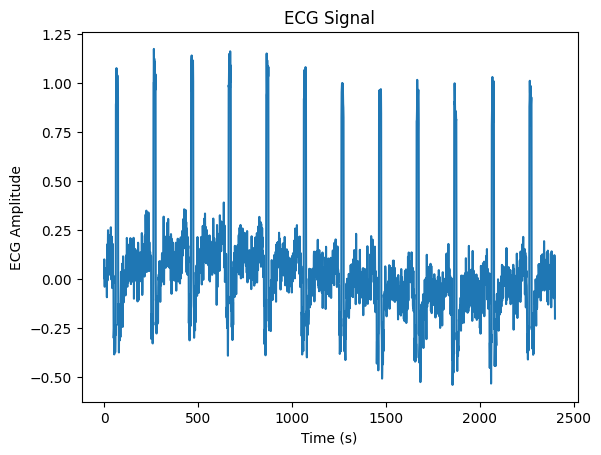

In [6]:
plt.plot(ecg_data)
plt.xlabel('Time (s)')
plt.title('ECG Signal')
plt.ylabel('ECG Amplitude')
plt.show()  

PART 2: FOURIER TRANSFORM OF THE ECG SIGNAL

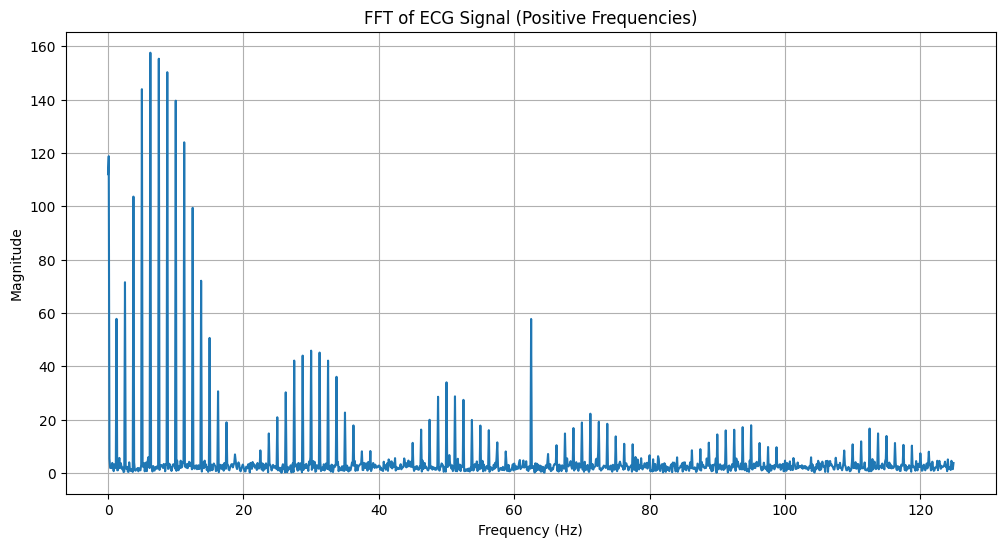

In [7]:
# Calculate the FFT
sampling_rate = 250  # Hz
N = len(ecg_data)
freq = np.fft.fftfreq(N, 1/sampling_rate)  # Get frequency array
fft_data = np.fft.fft(ecg_data)

# Only keep positive frequencies
positive_freq_mask = freq >= 0
freq = freq[positive_freq_mask]
fft_data = fft_data[positive_freq_mask]

# Plot the magnitude spectrum
plt.figure(figsize=(12, 6))
plt.plot(freq, np.abs(fft_data))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of ECG Signal (Positive Frequencies)')
plt.grid(True)
plt.show()

PART 3: FILTERING THE ECG SIGNAL

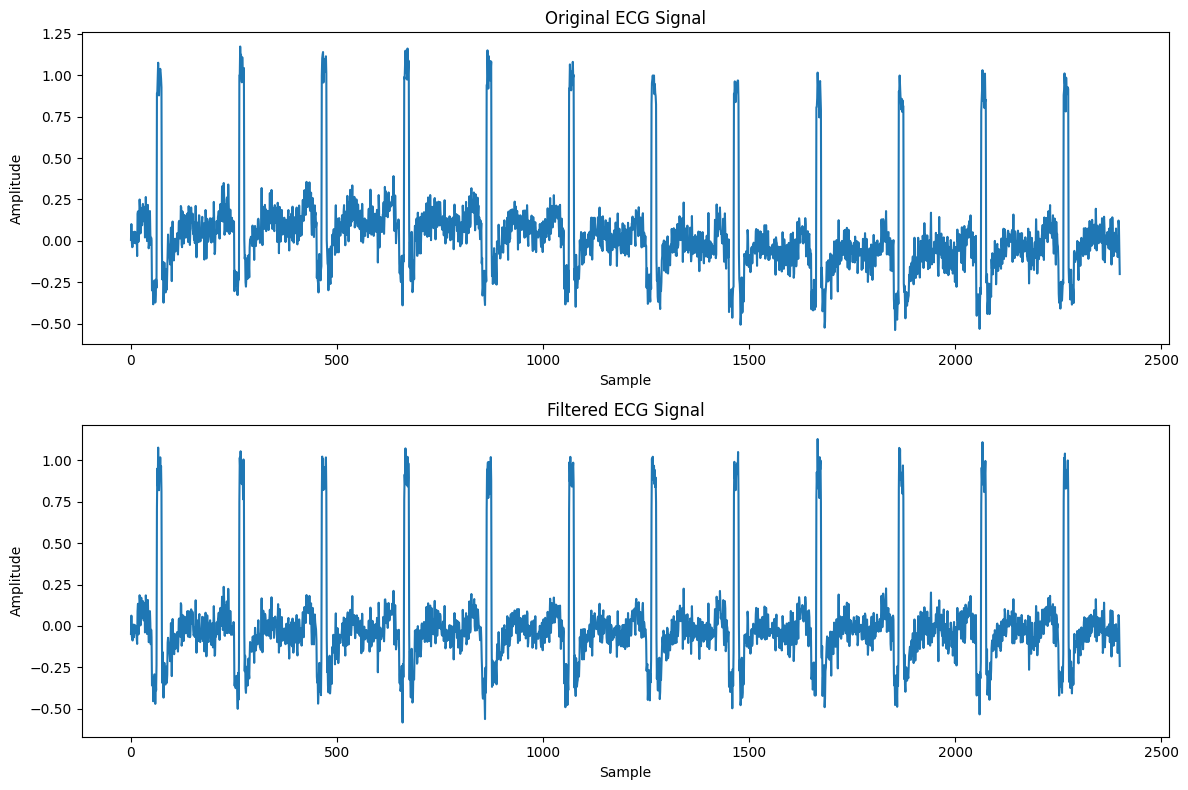

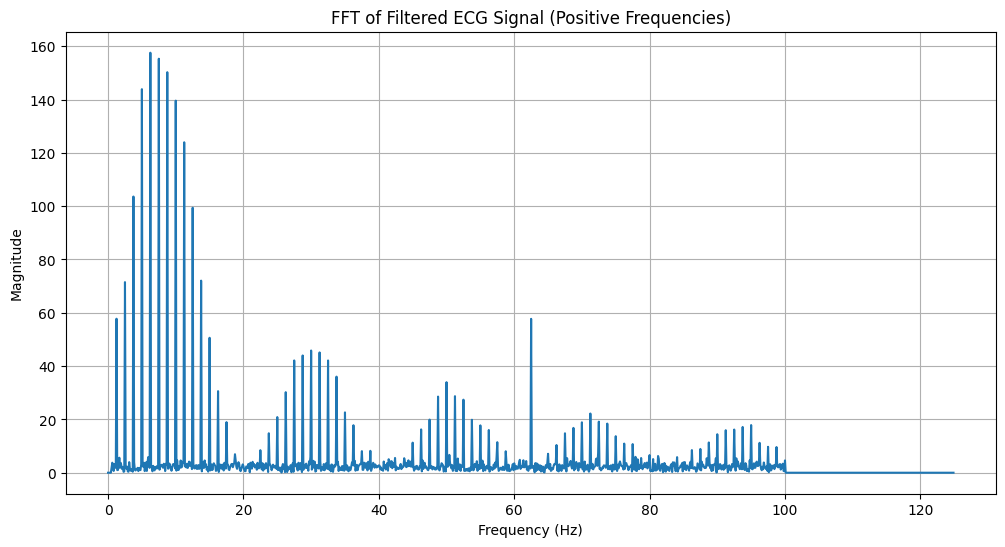

In [9]:
# Calculate the FFT
sampling_rate = 250  # Hz
N = len(ecg_data)
fft_data = np.fft.fft(ecg_data)
freq = np.fft.fftfreq(N, 1/sampling_rate)

# Create bandpass filter
low_freq = 0.5  # Hz
high_freq = 100  # Hz
mask = (np.abs(freq) >= low_freq) & (np.abs(freq) <= high_freq)

# Apply filter in frequency domain
filtered_fft = fft_data.copy()
filtered_fft[~mask] = 0

# Convert back to time domain (no need to reconstruct negative frequencies)
filtered_ecg = np.real(np.fft.ifft(filtered_fft))

# Plot original vs filtered signal
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(ecg_data)
plt.title('Original ECG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(filtered_ecg)
plt.title('Filtered ECG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Plot frequency spectrum (only positive frequencies)
positive_freq_mask = freq >= 0
freq_plot = freq[positive_freq_mask]
filtered_fft_plot = filtered_fft[positive_freq_mask]

plt.figure(figsize=(12, 6))
plt.plot(freq_plot, np.abs(filtered_fft_plot))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of Filtered ECG Signal (Positive Frequencies)')
plt.grid(True)
plt.show()

PART 4: HEART RATE CALCULATION

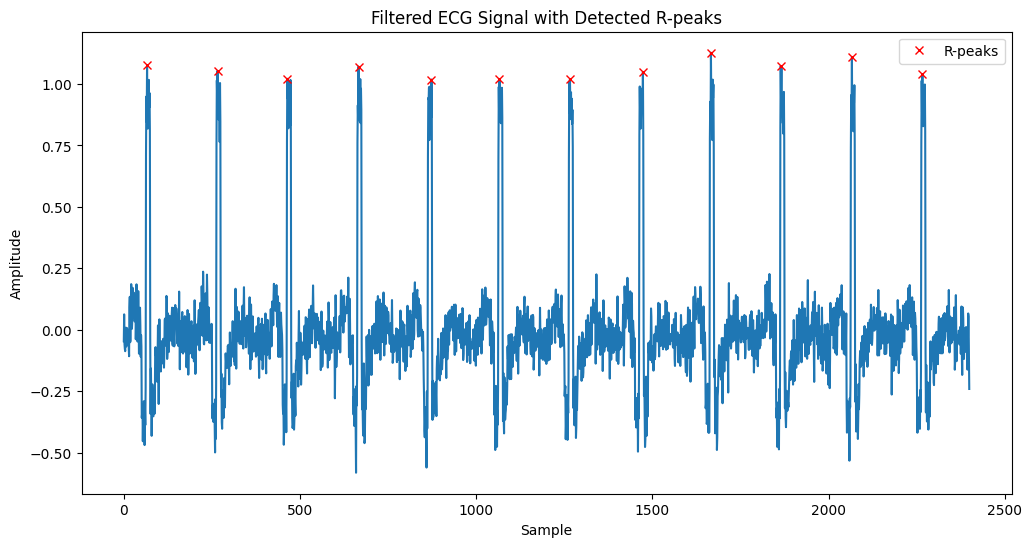

Average Heart Rate: 75.0 BPM
Min Heart Rate: 72.5 BPM
Max Heart Rate: 77.7 BPM
Heart Rate Variability (std): 1.6 BPM


In [10]:
# Detect R-peaks in the filtered signal
# The height parameter should be set to detect prominent R peaks
peaks, _ = find_peaks(filtered_ecg, height=0.5, distance=50)  # minimum distance between peaks = 50 samples

# Plot the filtered signal with detected R-peaks
plt.figure(figsize=(12, 6))
plt.plot(filtered_ecg)
plt.plot(peaks, filtered_ecg[peaks], "rx", label='R-peaks')
plt.title('Filtered ECG Signal with Detected R-peaks')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Calculate intervals between peaks (in samples)
peak_intervals = np.diff(peaks)

# Convert intervals to seconds
peak_intervals_seconds = peak_intervals / sampling_rate

# Calculate average heart rate
average_interval = np.mean(peak_intervals_seconds)
heart_rate_bpm = 60 / average_interval

print(f"Average Heart Rate: {heart_rate_bpm:.1f} BPM")

# Calculate instantaneous heart rates
instantaneous_hr = 60 / peak_intervals_seconds

print(f"Min Heart Rate: {np.min(instantaneous_hr):.1f} BPM")
print(f"Max Heart Rate: {np.max(instantaneous_hr):.1f} BPM")
print(f"Heart Rate Variability (std): {np.std(instantaneous_hr):.1f} BPM")

PART 5: SUMMARIZE THE RESULTS
- the averga heart rate was 75 bpm
- the min heart rate was 72.5 bpm
- the max heart rate was 77.7 bpm
- the heart rate variability was 1.6 bpm
- in out dataset, there were 12 R-peaks detected
- the filtered ecg signal looked cleaner and had a more consistent baseline; the original signal had more variation in amplitude and height